In [50]:
# Implementation of Random Forest Algorithm (only for the row samples)
# Author: Muhammad Humayun Khan

import numpy as np          # Linear Algebra
import pandas as pd         # Read data
from sklearn.datasets import make_classification    # dataset from the sklearn

In [51]:
# Generate the dataset and make the X and y labels
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [52]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,3.434726,4.728297,1.134406,-0.006612,2.289333,1
1,0.901750,0.160968,-0.849777,-1.276215,-0.660036,0
2,1.179536,0.787344,0.435328,0.071137,3.926361,1
3,1.392039,0.274952,1.539319,-0.698410,1.766154,1
4,0.630291,0.694358,-3.141908,1.111922,-0.856488,0


In [53]:
# function for row sampling,
# df = data will be provided, percent = select this much percentage of the data. let say 50 cent data
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

# applying row sample
df_one = sample_rows(df,0.1)     # 0.1 = 10 cent of the data
print(df_one)

        col1      col2      col3      col4      col5  target
28  1.101103  0.436288  0.745185 -0.569774  1.720105       1
8   1.050056 -0.631787  2.626589 -0.534451  2.211946       1
7   1.585608  2.609138 -1.612906  1.511736  0.073779       0
71  5.271559  1.739394  1.053052  1.428377  4.289518       1
15  3.417390  0.642129  0.610822  0.762789 -2.542905       0
41  0.836145  2.065077  0.334674 -1.068915  0.831251       1
58  0.451013  1.200542  1.551258 -1.275414  0.829250       1
48  2.954366  2.206120 -1.165086  0.779933 -0.539263       0
86  1.630396  2.033718  2.771819 -1.376397  0.305524       1
96 -0.308672  1.687197 -0.401894 -2.446135 -1.238542       1


In [54]:
df_two = sample_rows(df,0.1)    # second model
df_three = sample_rows(df,0.1)  # third model

# all df data should have same shape as (10,6)
print(df_one.shape)
print(df_two.shape)
print(df_three.shape)

(10, 6)
(10, 6)
(10, 6)


In [55]:
# Now to train the three models with the decision tree
from sklearn.tree import DecisionTreeClassifier

clf_one = DecisionTreeClassifier()
clf_two = DecisionTreeClassifier()
clf_three = DecisionTreeClassifier()

clf_one.fit(df_one.iloc[:,0:5],df_one.iloc[:,-1])
clf_two.fit(df_two.iloc[:,0:5],df_two.iloc[0:,-1])
clf_three.fit(df_three.iloc[:,0:5],df_three.iloc[0:,-1])

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[4] <= 0.19\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[3] <= -0.842\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

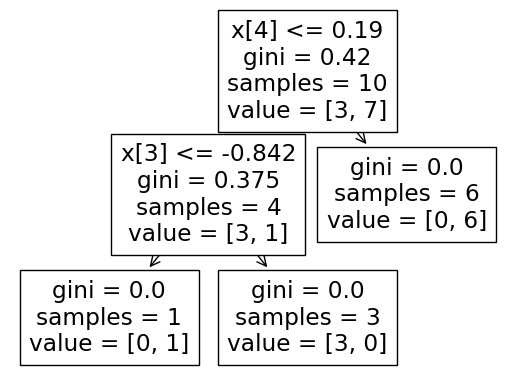

In [56]:
# Now plot the tree
from sklearn.tree import plot_tree
plot_tree(clf_one)

[Text(0.5, 0.75, 'x[3] <= -0.001\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

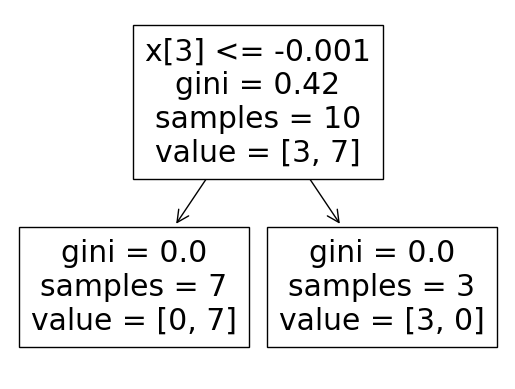

In [57]:
plot_tree(clf_two)

[Text(0.4, 0.8333333333333334, 'x[2] <= -0.427\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.5, 'x[4] <= -1.891\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

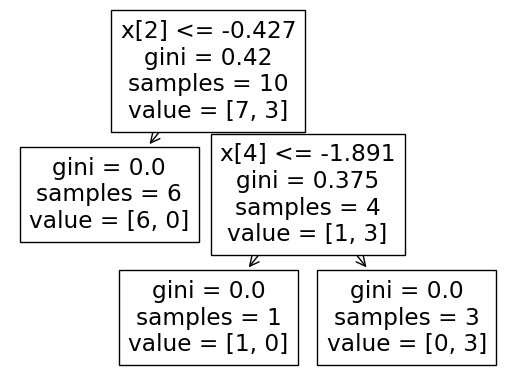

In [58]:
plot_tree(clf_three)

In [59]:
# lets predict a new value for the models, the models should predict target value as 1
clf_one.predict(np.array([-1.046205,-2.318689,-0.656215,2.032669,1.835995]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [60]:
clf_two.predict(np.array([-1.046205,-2.318689,-0.656215,2.032669,1.835995]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [61]:
clf_three.predict(np.array([-1.046205,-2.318689,-0.656215,2.032669,1.835995]).reshape(1,5))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])